dataset from https://data.mendeley.com/datasets/xv25yjbzkm/2

# **Diabetes Prediction using Machine Learning**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Diabetes Dataset.csv')
df.head()

,Gender,Age,Physical Activity,Smoking Status,Alcohol Intake,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Cholesterol,Diabetes Pedigree Function,Family History,Hypertension,Outcome
0,Male,63,Moderate,Former,NaN,103,40,7,41,28.196216,167,1.393,Yes,Yes,Diabetic
1,Female,51,Moderate,Never,Regular,104,59,21,51,30.438114,209,0.815,No,No,Diabetic
2,Female,74,Moderate,Current,NaN,128,70,18,199,38.700428,170,0.244,No,No,Diabetic
3,Male,78,Low,Never,Occasional,148,72,15,110,44.861600,170,0.336,No,No,Diabetic
4,Male,32,High,Never,NaN,102,55,18,49,21.591572,211,1.146,Yes,No,Non-diabetic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   Physical Activity           20000 non-null  object 
 3   Smoking Status              20000 non-null  object 
 4   Alcohol Intake              10075 non-null  object 
 5   Glucose                     20000 non-null  int64  
 6   Blood Pressure              20000 non-null  int64  
 7   Skin Thickness              20000 non-null  int64  
 8   Insulin                     20000 non-null  int64  
 9   BMI                         20000 non-null  float64
 10  Cholesterol                 20000 non-null  int64  
 11  Diabetes Pedigree Function  20000 non-null  float64
 12  Family History              20000 non-null  object 
 13  Hypertension                200

In [4]:
df.describe()

,Age,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Cholesterol,Diabetes Pedigree Function
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,49.565400,119.603400,69.432850,20.105450,83.952550,32.008980,189.555400,1.310665
std,17.320956,29.590699,12.016115,9.130969,53.026841,6.913271,35.081701,0.693984
min,20.000000,40.000000,30.000000,7.000000,15.000000,15.000000,100.000000,0.100000
25%,35.000000,99.000000,61.000000,13.000000,40.000000,27.314424,166.000000,0.704750
50%,50.000000,120.000000,69.000000,20.000000,79.000000,31.994040,190.000000,1.316000
75%,64.000000,140.000000,78.000000,26.000000,120.000000,36.750196,213.000000,1.914000
max,79.000000,200.000000,114.000000,57.000000,276.000000,50.000000,320.000000,2.500000


In [5]:
df_missing = df.isnull().sum()
df_missing

,0
Gender,0
Age,0
Physical Activity,0
Smoking Status,0
Alcohol Intake,9925
Glucose,0
Blood Pressure,0
Skin Thickness,0
Insulin,0
BMI,0


In [6]:
df.drop('Alcohol Intake', axis=1, inplace=True)

In [7]:
df.columns

Index(['Gender', 'Age', 'Physical Activity', 'Smoking Status', 'Glucose',
       'Blood Pressure', 'Skin Thickness', 'Insulin', 'BMI', 'Cholesterol',
       'Diabetes Pedigree Function', 'Family History', 'Hypertension',
       'Outcome'],
      dtype='object')

In [8]:
df_missing = df.isnull().sum()
df_missing

,0
Gender,0
Age,0
Physical Activity,0
Smoking Status,0
Glucose,0
Blood Pressure,0
Skin Thickness,0
Insulin,0
BMI,0
Cholesterol,0


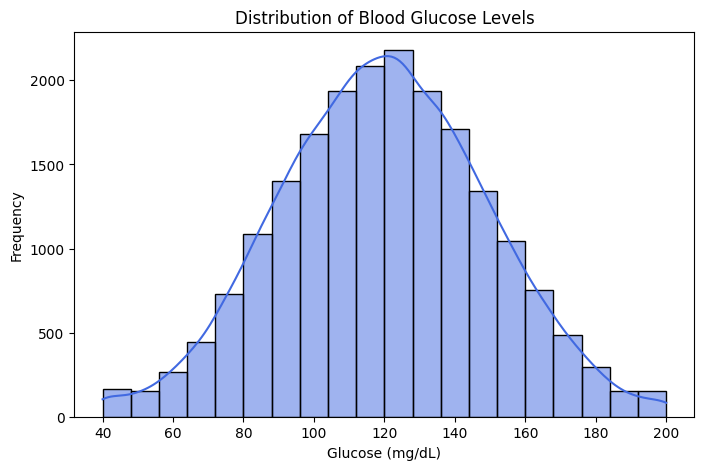

In [9]:
# thr histogram shows how glucose levels are distributed among individuals
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Glucose'], bins=20, kde=True, color='royalblue')
plt.title('Distribution of Blood Glucose Levels')
plt.xlabel('Glucose (mg/dL)')
plt.ylabel('Frequency')
plt.show()

The histogram indicates that glucose levels in the dataset are normally distributed, with most individuals having values around 120 mg/dL , suggesting that while most participants have normal glucose, a smaller number exhibit higher readings that may correspond to diabetic cases.

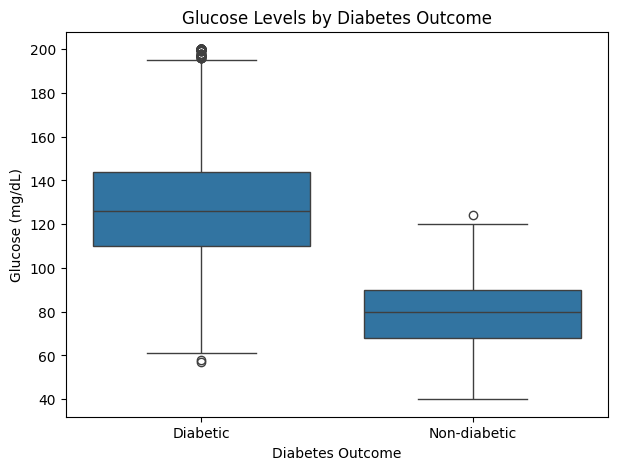

In [10]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose Levels by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose (mg/dL)')
plt.show()

Diabetic group: glucose values range roughly from 110 to 150 mg/dL.

Non-diabetic group: glucose values range roughly from 70 to 90 mg/dL.
This means that the Diabetics consistently have higher glucose levels than non-diabetics and most diabetics have an elevated glucose level.
This means Glucose is strongly associated with diabetes.

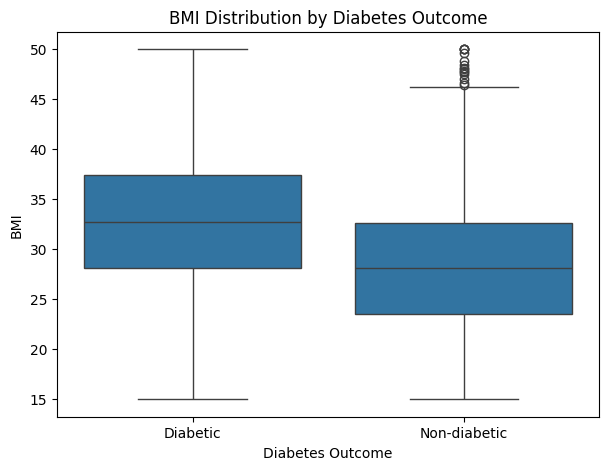

In [11]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('BMI Distribution by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('BMI')
plt.show()

Imterpretation Diabetic group: BMI values range roughly from 28 to 37.5. Non-diabetic group: BMI values range roughly from 23 to 32.There is some overlap in BMI ranges (28–32), meaning a few non-diabetic individuals have BMI in the same range as diabetics. Higher BMI is associated with higher likelihood of being diabetic, but it is less definitive than glucose, since some non-diabetic individuals also have elevated BMI.

In [12]:
df_encoded_data = df.copy()

In [13]:
df_encoded_data.head(10)

,Gender,Age,Physical Activity,Smoking Status,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Cholesterol,Diabetes Pedigree Function,Family History,Hypertension,Outcome
0,Male,63,Moderate,Former,103,40,7,41,28.196216,167,1.393,Yes,Yes,Diabetic
1,Female,51,Moderate,Never,104,59,21,51,30.438114,209,0.815,No,No,Diabetic
2,Female,74,Moderate,Current,128,70,18,199,38.700428,170,0.244,No,No,Diabetic
3,Male,78,Low,Never,148,72,15,110,44.861600,170,0.336,No,No,Diabetic
4,Male,32,High,Never,102,55,18,49,21.591572,211,1.146,Yes,No,Non-diabetic
5,Male,47,Low,Former,93,61,21,38,29.296372,170,0.530,Yes,No,Non-diabetic
6,Male,79,Moderate,Current,138,76,30,15,40.583975,210,0.140,No,No,Diabetic
7,Female,37,Low,Never,119,53,26,143,31.609849,199,1.197,No,Yes,Diabetic
8,Female,49,Moderate,Current,144,71,23,103,30.911042,214,2.489,No,No,Diabetic
9,Female,75,Moderate,Current,92,84,43,117,36.021504,212,2.437,No,No,Diabetic


In [14]:
# encoding data
df_encoded_data['Outcome'] = df_encoded_data['Outcome'].str.strip().str.lower()
df_encoded_data['Outcome'] = df_encoded_data['Outcome'].map({'diabetic':1, 'non-diabetic':0})


In [15]:
df_encoded_data.head()

,Gender,Age,Physical Activity,Smoking Status,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Cholesterol,Diabetes Pedigree Function,Family History,Hypertension,Outcome
0,Male,63,Moderate,Former,103,40,7,41,28.196216,167,1.393,Yes,Yes,1
1,Female,51,Moderate,Never,104,59,21,51,30.438114,209,0.815,No,No,1
2,Female,74,Moderate,Current,128,70,18,199,38.700428,170,0.244,No,No,1
3,Male,78,Low,Never,148,72,15,110,44.861600,170,0.336,No,No,1
4,Male,32,High,Never,102,55,18,49,21.591572,211,1.146,Yes,No,0


In [16]:
# Encoding the remaing data
binary_mappings = {
    'Gender': {'male':1, 'female':0},
    'Family History': {'yes':1, 'no':0},
    'Hypertension': {'yes':1, 'no':0}
}

for col, mapping in binary_mappings.items():
    df_encoded_data[col] = df_encoded_data[col].str.strip().str.lower().map(mapping)



In [17]:
df_encoded_data.head(10)

,Gender,Age,Physical Activity,Smoking Status,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Cholesterol,Diabetes Pedigree Function,Family History,Hypertension,Outcome
0,1,63,Moderate,Former,103,40,7,41,28.196216,167,1.393,1,1,1
1,0,51,Moderate,Never,104,59,21,51,30.438114,209,0.815,0,0,1
2,0,74,Moderate,Current,128,70,18,199,38.700428,170,0.244,0,0,1
3,1,78,Low,Never,148,72,15,110,44.861600,170,0.336,0,0,1
4,1,32,High,Never,102,55,18,49,21.591572,211,1.146,1,0,0
5,1,47,Low,Former,93,61,21,38,29.296372,170,0.530,1,0,0
6,1,79,Moderate,Current,138,76,30,15,40.583975,210,0.140,0,0,1
7,0,37,Low,Never,119,53,26,143,31.609849,199,1.197,0,1,1
8,0,49,Moderate,Current,144,71,23,103,30.911042,214,2.489,0,0,1
9,0,75,Moderate,Current,92,84,43,117,36.021504,212,2.437,0,0,1


In [18]:
df_encoded_data.isnull().sum()

,0
Gender,0
Age,0
Physical Activity,0
Smoking Status,0
Glucose,0
Blood Pressure,0
Skin Thickness,0
Insulin,0
BMI,0
Cholesterol,0


In [19]:
# one hot encoding smoking status and physical activity
multi_cols = ['Physical Activity', 'Smoking Status']
df_encoded_data = pd.get_dummies(df_encoded_data, columns=multi_cols, drop_first=True)

In [21]:
df_encoded_data.head(10)

,Gender,Age,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Cholesterol,Diabetes Pedigree Function,Family History,Hypertension,Outcome,Physical Activity_Low,Physical Activity_Moderate,Smoking Status_Former,Smoking Status_Never
0,1,63,103,40,7,41,28.196216,167,1.393,1,1,1,False,True,True,False
1,0,51,104,59,21,51,30.438114,209,0.815,0,0,1,False,True,False,True
2,0,74,128,70,18,199,38.700428,170,0.244,0,0,1,False,True,False,False
3,1,78,148,72,15,110,44.861600,170,0.336,0,0,1,True,False,False,True
4,1,32,102,55,18,49,21.591572,211,1.146,1,0,0,False,False,False,True
5,1,47,93,61,21,38,29.296372,170,0.530,1,0,0,True,False,True,False
6,1,79,138,76,30,15,40.583975,210,0.140,0,0,1,False,True,False,False
7,0,37,119,53,26,143,31.609849,199,1.197,0,1,1,True,False,False,True
8,0,49,144,71,23,103,30.911042,214,2.489,0,0,1,False,True,False,False
9,0,75,92,84,43,117,36.021504,212,2.437,0,0,1,False,True,False,False


In [22]:
# converting the booleans to integers
for col in df_encoded_data.columns:
    if df_encoded_data[col].dtype == 'bool':
        df_encoded_data[col] = df_encoded_data[col].astype(int)


In [23]:
df_encoded_data.head(10)

,Gender,Age,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Cholesterol,Diabetes Pedigree Function,Family History,Hypertension,Outcome,Physical Activity_Low,Physical Activity_Moderate,Smoking Status_Former,Smoking Status_Never
0,1,63,103,40,7,41,28.196216,167,1.393,1,1,1,0,1,1,0
1,0,51,104,59,21,51,30.438114,209,0.815,0,0,1,0,1,0,1
2,0,74,128,70,18,199,38.700428,170,0.244,0,0,1,0,1,0,0
3,1,78,148,72,15,110,44.861600,170,0.336,0,0,1,1,0,0,1
4,1,32,102,55,18,49,21.591572,211,1.146,1,0,0,0,0,0,1
5,1,47,93,61,21,38,29.296372,170,0.530,1,0,0,1,0,1,0
6,1,79,138,76,30,15,40.583975,210,0.140,0,0,1,0,1,0,0
7,0,37,119,53,26,143,31.609849,199,1.197,0,1,1,1,0,0,1
8,0,49,144,71,23,103,30.911042,214,2.489,0,0,1,0,1,0,0
9,0,75,92,84,43,117,36.021504,212,2.437,0,0,1,0,1,0,0


In [24]:
import seaborn as sns

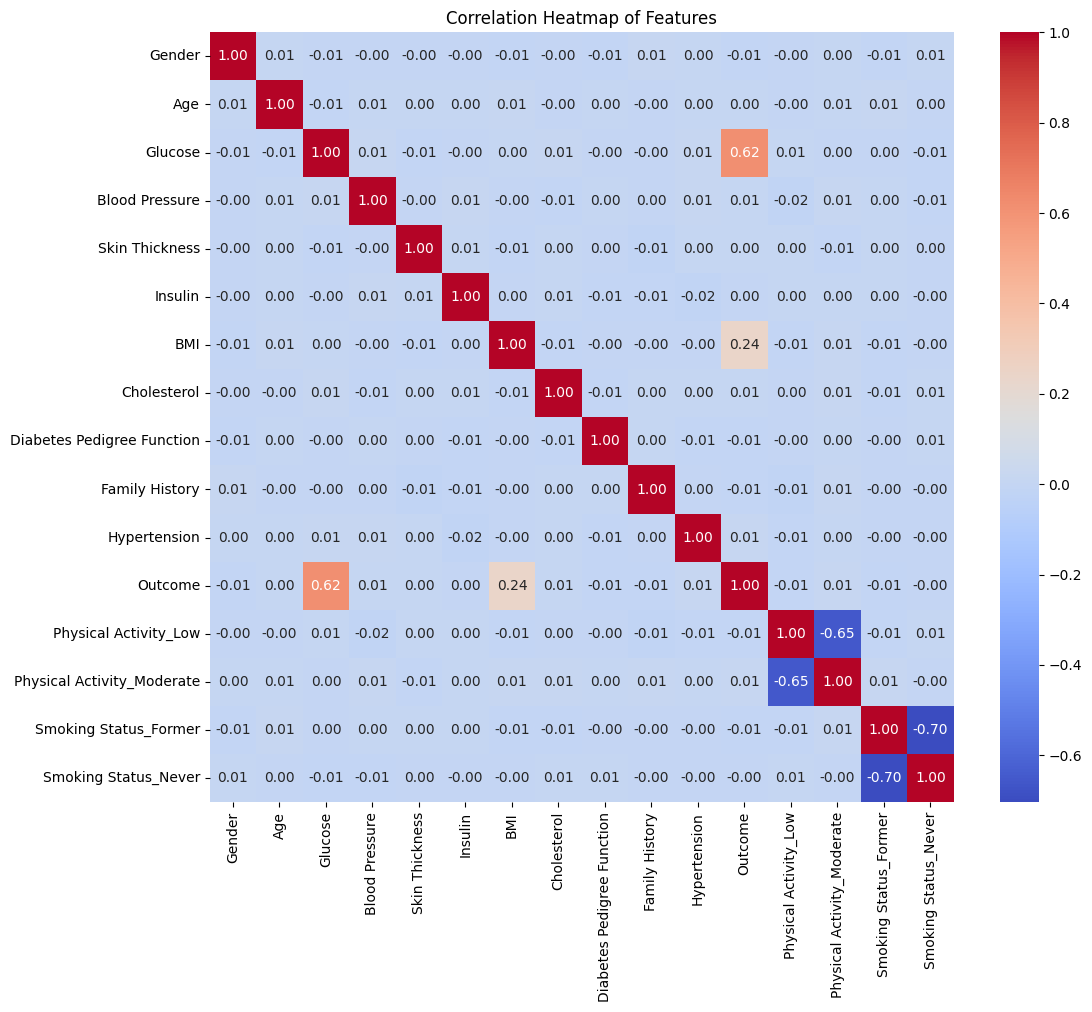

In [25]:

#heatmap showing the correlation
plt.figure(figsize=(12,10))
corr = df_encoded_data.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Features")
plt.show()

**Interpretation of the heat map**
Most correlations are around 0.01–0.02 or -0.01, which is basically very weak. These features do not have a strong linear relationship with each other or with Outcome.

Glucose vs Outcome = 0.62 → This is a strong positive correlation indicating higher glucose values are strongly associated with being diabetic.

Outcome vs BMI = 0.24 → Moderate positive correlation, higher BMI tends to slightly increase diabetes likelihood.

Negative correlations (-0.00, -0.01) → Effectively no correlation; these features do not influence Outcome in a linear way.
Therefore Glucose is the most important numeric predictor

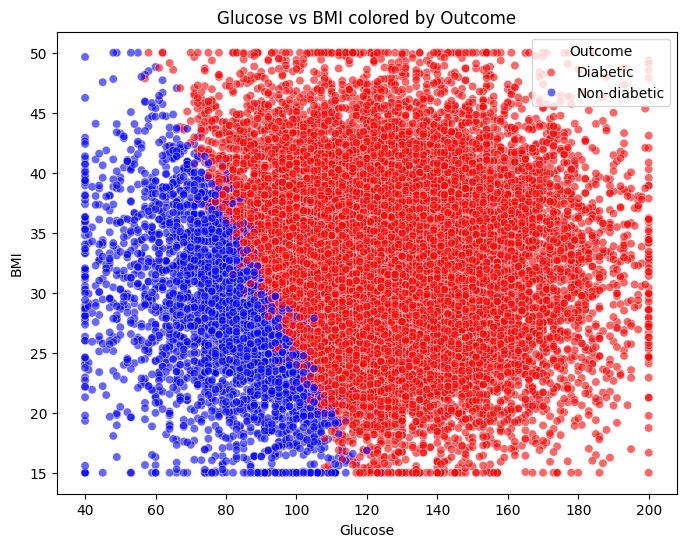

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Glucose',
    y='BMI',
    hue='Outcome',
    data=df_encoded_data,
    palette={0:'blue', 1:'red'},
    alpha=0.6
)
plt.title('Glucose vs BMI colored by Outcome')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend(title='Outcome', labels=['Diabetic','Non-diabetic'])
plt.show()

Diabetic (red) cluster: Mostly Glucose 120+ and BMI 28–40.
Non-diabetic (blue) cluster: Mostly Glucose below 120 and BMI 23–32.
This implies that Glucose is the strongest differentiator, while BMI also contributes moderately.

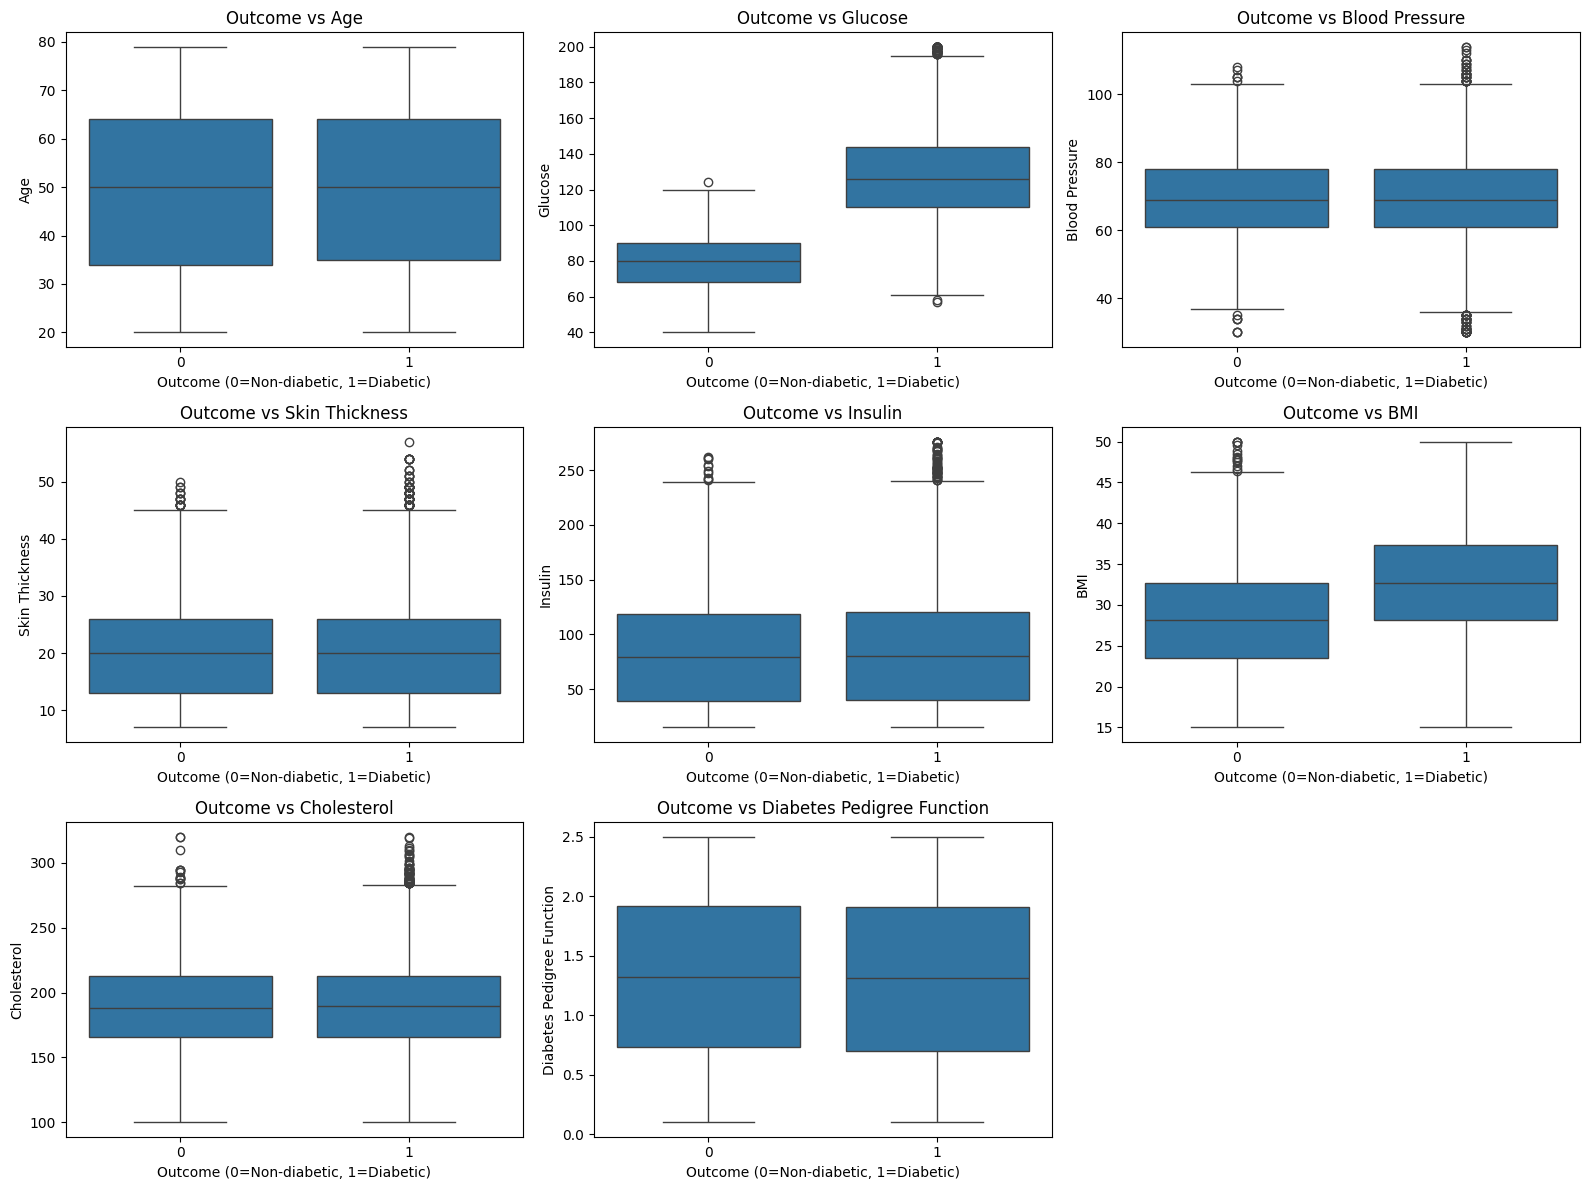

In [29]:
numeric_cols = ['Age', 'Glucose', 'Blood Pressure', 'Skin Thickness',
                'Insulin', 'BMI', 'Cholesterol', 'Diabetes Pedigree Function']

plt.figure(figsize=(16,12))

for i, col in enumerate(numeric_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x='Outcome', y=col, data=df_encoded_data)
    plt.title(f'Outcome vs {col}')
    plt.xlabel('Outcome (0=Non-diabetic, 1=Diabetic)')

plt.tight_layout()
plt.show()

**Modelling data**
Using Logistic Regression


In [30]:
X = df_encoded_data.drop('Outcome', axis = 1)
y = df_encoded_data['Outcome']

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42, stratify=y
)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [34]:
# training a logistic models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score

model = LogisticRegression()
model.fit(X_train_scaled,y_train )
# making predictions
y_predictions = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]

In [35]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predictions))
print("\nClassification Report:\n", classification_report(y_test, y_predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[ 594   61]
 [  26 3319]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       655
           1       0.98      0.99      0.99      3345

    accuracy                           0.98      4000
   macro avg       0.97      0.95      0.96      4000
weighted avg       0.98      0.98      0.98      4000

ROC-AUC Score: 0.9971574299113408


**Using Random Forest**

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

In [37]:
# confusion matrix
confusion_matrix(y_test, y_pred_rf)

array([[ 591,   64],
       [  37, 3308]])

In [39]:
# classification report
classification_report(y_test, y_pred_rf)

'              precision    recall  f1-score   support\n\n           0       0.94      0.90      0.92       655\n           1       0.98      0.99      0.98      3345\n\n    accuracy                           0.97      4000\n   macro avg       0.96      0.95      0.95      4000\nweighted avg       0.97      0.97      0.97      4000\n'

In [40]:
# Random Forest ROC-AUC Score
roc_auc_score(y_test, y_proba_rf)

np.float64(0.9955777678887253)

**Feature Importance**

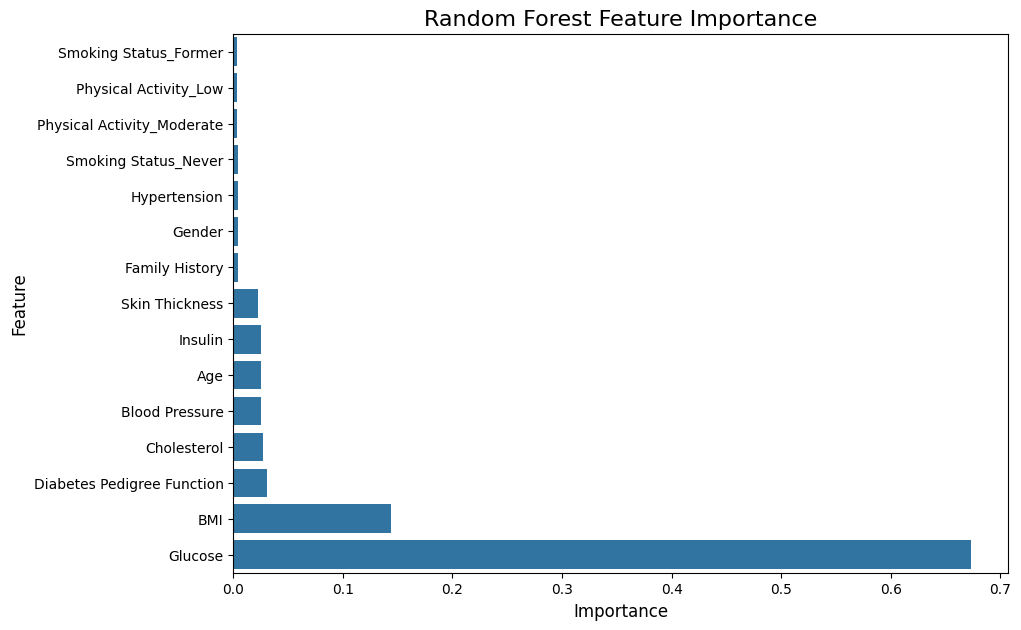

In [43]:
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})

feat_df = feature_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10,7))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Random Forest Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

Feature Importance Interpretation

Most important predictors

Glucose (0.67–0.68) → clearly the strongest indicator of diabetes.

BMI (0.15) → significant contributor, showing higher BMI is associated with higher risk.

Moderate contributors

Age, Insulin, Blood Pressure, Skin Thickness (0.02–0.05) → these features provide some predictive value but are less influential than Glucose and BMI.

Least important predictors

Smoking Status, Physical Activity, Hypertension, Family History (~0) → in this dataset, these features don’t add much predictive power to the model.